<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Head-et-Tail" data-toc-modified-id="Head-et-Tail-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Head et Tail</a></span></li><li><span><a href="#Columns-et-Index" data-toc-modified-id="Columns-et-Index-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Columns et Index</a></span></li><li><span><a href="#Filtrer-les-lignes-et-les-colonnes" data-toc-modified-id="Filtrer-les-lignes-et-les-colonnes-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Filtrer les lignes et les colonnes</a></span></li><li><span><a href="#drop" data-toc-modified-id="drop-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>drop</a></span></li></ul></div>

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


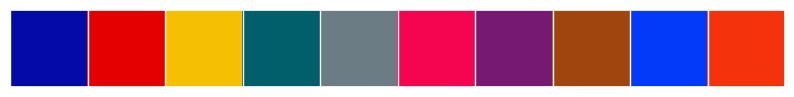

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os, warnings, math, yaml, pickle
from IPython.display import Image, display
from functools       import partial
from pathlib import Path

%pylab inline

plt.style.use('seaborn-darkgrid')
warnings.filterwarnings(action="ignore")

sns.set(font_scale=2)
random_seed = 123456789
np.random.seed(random_seed)
palette = ["#030aa7","#e50000","#f5bf03","#005f6a","#6b7c85",
           "#f5054f","#751973","#a0450e","#0339f8","#f4320c"]
sns.palplot(sns.color_palette(palette))

In [8]:
%%time
meteo = pd.read_parquet('../donnees/meteo.gzip', engine='pyarrow')
meteo.dtypes

CPU times: total: 984 ms
Wall time: 997 ms


Nom                      object
Latitude                float64
Longitude               float64
Altitude                  int16
Zone                     object
DateHeure        datetime64[ns]
DirectionVent           float64
VitesseVent             float64
Temperature             float64
Humidite                float64
Visibilite              float64
Pression                float64
Mois                      int64
Annee                     int64
AnneeMois                 int64
Semaine                   int64
MoisJour                  int64
JourA                     int64
Precipitation           float64
dtype: object

In [12]:
meteo.shape

(2954549, 19)

In [13]:
meteo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2954549 entries, 0 to 2954548
Data columns (total 19 columns):
 #   Column         Dtype         
---  ------         -----         
 0   Nom            object        
 1   Latitude       float64       
 2   Longitude      float64       
 3   Altitude       int16         
 4   Zone           object        
 5   DateHeure      datetime64[ns]
 6   DirectionVent  float64       
 7   VitesseVent    float64       
 8   Temperature    float64       
 9   Humidite       float64       
 10  Visibilite     float64       
 11  Pression       float64       
 12  Mois           int64         
 13  Annee          int64         
 14  AnneeMois      int64         
 15  Semaine        int64         
 16  MoisJour       int64         
 17  JourA          int64         
 18  Precipitation  float64       
dtypes: datetime64[ns](1), float64(9), int16(1), int64(6), object(2)
memory usage: 433.9+ MB


# Head et Tail 

In [6]:
meteo.head()

,Nom,Latitude,Longitude,Altitude,Zone,DateHeure,DirectionVent,VitesseVent,Temperature,Humidite,Visibilite,Pression,Mois,Annee,AnneeMois,Semaine,MoisJour,JourA,Precipitation
0,Abbeville,50.136,1.834,69,NO,1997-01-01 00:00:00,80.0,6.1,-10.61,78.0,NaN,1009.1,1,1997,199701,1,101,1,0.0
1,Abbeville,50.136,1.834,69,NO,1997-01-01 03:00:00,60.0,7.2,-11.50,79.0,NaN,1008.8,1,1997,199701,1,101,1,NaN
2,Abbeville,50.136,1.834,69,NO,1997-01-01 06:00:00,70.0,7.2,-11.70,79.0,6.0,1009.2,1,1997,199701,1,101,1,0.0
3,Abbeville,50.136,1.834,69,NO,1997-01-01 09:00:00,80.0,8.2,-11.80,77.0,3.0,1010.1,1,1997,199701,1,101,1,NaN
4,Abbeville,50.136,1.834,69,NO,1997-01-01 12:00:00,70.0,8.2,-10.30,72.0,3.0,1010.4,1,1997,199701,1,101,1,0.0


In [7]:
meteo.tail()

,Nom,Latitude,Longitude,Altitude,Zone,DateHeure,DirectionVent,VitesseVent,Temperature,Humidite,Visibilite,Pression,Mois,Annee,AnneeMois,Semaine,MoisJour,JourA,Precipitation
2954544,Bastia,42.540667,9.485167,10,SE,2021-11-30 09:00:00,180.0,2.0,11.9,40.0,46.18,1018.7,11,2021,202111,48,1130,334,0.0
2954545,Bastia,42.540667,9.485167,10,SE,2021-11-30 12:00:00,100.0,2.6,13.9,34.0,59.03,1018.2,11,2021,202111,48,1130,334,0.0
2954546,Bastia,42.540667,9.485167,10,SE,2021-11-30 15:00:00,140.0,2.9,12.6,39.0,40.29,1017.8,11,2021,202111,48,1130,334,0.0
2954547,Bastia,42.540667,9.485167,10,SE,2021-11-30 18:00:00,220.0,1.9,5.7,67.0,20.00,1017.6,11,2021,202111,48,1130,334,0.0
2954548,Bastia,42.540667,9.485167,10,SE,2021-11-30 21:00:00,230.0,4.0,7.0,58.0,60.00,1016.9,11,2021,202111,48,1130,334,0.0


# Columns et Index

In [10]:
meteo.columns

Index(['Nom', 'Latitude', 'Longitude', 'Altitude', 'Zone', 'DateHeure',
       'DirectionVent', 'VitesseVent', 'Temperature', 'Humidite', 'Visibilite',
       'Pression', 'Mois', 'Annee', 'AnneeMois', 'Semaine', 'MoisJour',
       'JourA', 'Precipitation'],
      dtype='object')

In [11]:
meteo.index

Int64Index([      0,       1,       2,       3,       4,       5,       6,
                  7,       8,       9,
            ...
            2954539, 2954540, 2954541, 2954542, 2954543, 2954544, 2954545,
            2954546, 2954547, 2954548],
           dtype='int64', length=2954549)

# Filtrer les lignes et les colonnes

In [16]:
meteo.iloc[1:10,1:10]

,Latitude,Longitude,Altitude,Zone,DateHeure,DirectionVent,VitesseVent,Temperature,Humidite
1,50.136,1.834,69,NO,1997-01-01 03:00:00,60.0,7.2,-11.50,79.0
2,50.136,1.834,69,NO,1997-01-01 06:00:00,70.0,7.2,-11.70,79.0
3,50.136,1.834,69,NO,1997-01-01 09:00:00,80.0,8.2,-11.80,77.0
4,50.136,1.834,69,NO,1997-01-01 12:00:00,70.0,8.2,-10.30,72.0
5,50.136,1.834,69,NO,1997-01-01 15:00:00,70.0,5.1,-9.11,68.0
6,50.136,1.834,69,NO,1997-01-01 18:00:00,80.0,4.1,-10.40,75.0
7,50.136,1.834,69,NO,1997-01-01 21:00:00,80.0,3.0,-10.61,77.0
8,50.136,1.834,69,NO,1997-01-02 00:00:00,50.0,3.0,-10.80,77.0
9,50.136,1.834,69,NO,1997-01-02 03:00:00,90.0,2.0,-10.50,76.0


In [17]:
meteo.loc[1:10,]

,Nom,Latitude,Longitude,Altitude,Zone,DateHeure,DirectionVent,VitesseVent,Temperature,Humidite,Visibilite,Pression,Mois,Annee,AnneeMois,Semaine,MoisJour,JourA,Precipitation
1,Abbeville,50.136,1.834,69,NO,1997-01-01 03:00:00,60.0,7.2,-11.50,79.0,NaN,1008.8,1,1997,199701,1,101,1,NaN
2,Abbeville,50.136,1.834,69,NO,1997-01-01 06:00:00,70.0,7.2,-11.70,79.0,6.0,1009.2,1,1997,199701,1,101,1,0.0
3,Abbeville,50.136,1.834,69,NO,1997-01-01 09:00:00,80.0,8.2,-11.80,77.0,3.0,1010.1,1,1997,199701,1,101,1,NaN
4,Abbeville,50.136,1.834,69,NO,1997-01-01 12:00:00,70.0,8.2,-10.30,72.0,3.0,1010.4,1,1997,199701,1,101,1,0.0
5,Abbeville,50.136,1.834,69,NO,1997-01-01 15:00:00,70.0,5.1,-9.11,68.0,4.0,1010.8,1,1997,199701,1,101,1,0.0
6,Abbeville,50.136,1.834,69,NO,1997-01-01 18:00:00,80.0,4.1,-10.40,75.0,NaN,1012.0,1,1997,199701,1,101,1,0.0
7,Abbeville,50.136,1.834,69,NO,1997-01-01 21:00:00,80.0,3.0,-10.61,77.0,NaN,1012.5,1,1997,199701,1,101,1,NaN
8,Abbeville,50.136,1.834,69,NO,1997-01-02 00:00:00,50.0,3.0,-10.80,77.0,NaN,1012.6,1,1997,199701,1,102,2,0.0
9,Abbeville,50.136,1.834,69,NO,1997-01-02 03:00:00,90.0,2.0,-10.50,76.0,NaN,1012.2,1,1997,199701,1,102,2,NaN
10,Abbeville,50.136,1.834,69,NO,1997-01-02 06:00:00,90.0,3.0,-10.80,81.0,4.0,1011.4,1,1997,199701,1,102,2,0.0


In [18]:
meteo.loc[1:10,'Nom':'DateHeure']

,Nom,Latitude,Longitude,Altitude,Zone,DateHeure
1,Abbeville,50.136,1.834,69,NO,1997-01-01 03:00:00
2,Abbeville,50.136,1.834,69,NO,1997-01-01 06:00:00
3,Abbeville,50.136,1.834,69,NO,1997-01-01 09:00:00
4,Abbeville,50.136,1.834,69,NO,1997-01-01 12:00:00
5,Abbeville,50.136,1.834,69,NO,1997-01-01 15:00:00
6,Abbeville,50.136,1.834,69,NO,1997-01-01 18:00:00
7,Abbeville,50.136,1.834,69,NO,1997-01-01 21:00:00
8,Abbeville,50.136,1.834,69,NO,1997-01-02 00:00:00
9,Abbeville,50.136,1.834,69,NO,1997-01-02 03:00:00
10,Abbeville,50.136,1.834,69,NO,1997-01-02 06:00:00


In [19]:
meteo.loc[1:10,['Nom', 'Latitude', 'Longitude', 'Altitude', 'Zone', 'Temperature', 'Mois', 'Annee', 'Semaine']]

,Nom,Latitude,Longitude,Altitude,Zone,Temperature,Mois,Annee,Semaine
1,Abbeville,50.136,1.834,69,NO,-11.50,1,1997,1
2,Abbeville,50.136,1.834,69,NO,-11.70,1,1997,1
3,Abbeville,50.136,1.834,69,NO,-11.80,1,1997,1
4,Abbeville,50.136,1.834,69,NO,-10.30,1,1997,1
5,Abbeville,50.136,1.834,69,NO,-9.11,1,1997,1
6,Abbeville,50.136,1.834,69,NO,-10.40,1,1997,1
7,Abbeville,50.136,1.834,69,NO,-10.61,1,1997,1
8,Abbeville,50.136,1.834,69,NO,-10.80,1,1997,1
9,Abbeville,50.136,1.834,69,NO,-10.50,1,1997,1
10,Abbeville,50.136,1.834,69,NO,-10.80,1,1997,1


# drop

In [20]:
meteo.columns

Index(['Nom', 'Latitude', 'Longitude', 'Altitude', 'Zone', 'DateHeure',
       'DirectionVent', 'VitesseVent', 'Temperature', 'Humidite', 'Visibilite',
       'Pression', 'Mois', 'Annee', 'AnneeMois', 'Semaine', 'MoisJour',
       'JourA', 'Precipitation'],
      dtype='object')

In [22]:
meteo.drop(columns=['DateHeure','DirectionVent', 'VitesseVent','Humidite', 'Visibilite', 'Pression' ]).head()

,Nom,Latitude,Longitude,Altitude,Zone,Temperature,Mois,Annee,AnneeMois,Semaine,MoisJour,JourA,Precipitation
0,Abbeville,50.136,1.834,69,NO,-10.61,1,1997,199701,1,101,1,0.0
1,Abbeville,50.136,1.834,69,NO,-11.50,1,1997,199701,1,101,1,NaN
2,Abbeville,50.136,1.834,69,NO,-11.70,1,1997,199701,1,101,1,0.0
3,Abbeville,50.136,1.834,69,NO,-11.80,1,1997,199701,1,101,1,NaN
4,Abbeville,50.136,1.834,69,NO,-10.30,1,1997,199701,1,101,1,0.0


In [23]:
meteo.head()

,Nom,Latitude,Longitude,Altitude,Zone,DateHeure,DirectionVent,VitesseVent,Temperature,Humidite,Visibilite,Pression,Mois,Annee,AnneeMois,Semaine,MoisJour,JourA,Precipitation
0,Abbeville,50.136,1.834,69,NO,1997-01-01 00:00:00,80.0,6.1,-10.61,78.0,NaN,1009.1,1,1997,199701,1,101,1,0.0
1,Abbeville,50.136,1.834,69,NO,1997-01-01 03:00:00,60.0,7.2,-11.50,79.0,NaN,1008.8,1,1997,199701,1,101,1,NaN
2,Abbeville,50.136,1.834,69,NO,1997-01-01 06:00:00,70.0,7.2,-11.70,79.0,6.0,1009.2,1,1997,199701,1,101,1,0.0
3,Abbeville,50.136,1.834,69,NO,1997-01-01 09:00:00,80.0,8.2,-11.80,77.0,3.0,1010.1,1,1997,199701,1,101,1,NaN
4,Abbeville,50.136,1.834,69,NO,1997-01-01 12:00:00,70.0,8.2,-10.30,72.0,3.0,1010.4,1,1997,199701,1,101,1,0.0


In [24]:
meteo.drop(columns=['DateHeure','DirectionVent', 'VitesseVent','Humidite', 'Visibilite', 'Pression' ], inplace=True)
meteo.head()

,Nom,Latitude,Longitude,Altitude,Zone,Temperature,Mois,Annee,AnneeMois,Semaine,MoisJour,JourA,Precipitation
0,Abbeville,50.136,1.834,69,NO,-10.61,1,1997,199701,1,101,1,0.0
1,Abbeville,50.136,1.834,69,NO,-11.50,1,1997,199701,1,101,1,NaN
2,Abbeville,50.136,1.834,69,NO,-11.70,1,1997,199701,1,101,1,0.0
3,Abbeville,50.136,1.834,69,NO,-11.80,1,1997,199701,1,101,1,NaN
4,Abbeville,50.136,1.834,69,NO,-10.30,1,1997,199701,1,101,1,0.0
